D’autres cas d’utilisation peuvent être :

- Saisie automatique de données pour des documents d’entreprise, par exemple : formulaires papier, chèques, passeports, factures, relevés bancaires, reçus, etc ;
- Reconnaissance automatique des plaques d’immatriculation ;
 - Reconnaissance des passeports de voyageurs dans un aéroport et l’extraction de l’information importante ;
- Extraction automatique d’informations clés dans des documents d’assurance ;
- Extraction des informations de carte d’affaires ;
- Numérisation de gros documents imprimés, par exemple des livres ;
Rendre disponible à la recherche le texte d’images des documents imprimés ;
- Conversion de l’écriture manuscrite en temps réel pour contrôler un ordinateur (pen computing – via une tablette graphique ou un écran tactile par exemple).

D’autres cas d’utilisation peuvent être :

- Saisie automatique de données pour des documents d’entreprise, par exemple : formulaires papier, chèques, passeports, factures, relevés bancaires, reçus, etc ;
- Reconnaissance automatique des plaques d’immatriculation ;
 - Reconnaissance des passeports de voyageurs dans un aéroport et l’extraction de l’information importante ;
- Extraction automatique d’informations clés dans des documents d’assurance ;
- Extraction des informations de carte d’affaires ;
- Numérisation de gros documents imprimés, par exemple des livres ;
Rendre disponible à la recherche le texte d’images des documents imprimés ;
- Conversion de l’écriture manuscrite en temps réel pour contrôler un ordinateur (pen computing – via une tablette graphique ou un écran tactile par exemple).

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import cv2
import os
from resize_photo import *
import matplotlib.pyplot as plt
import random

import cv2
from PIL import Image, ImageOps
import numpy as np
from pytesseract import * 
%matplotlib inline


from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=  3,suppress=True)



%matplotlib widget


2024-04-04 23:13:05.665117: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 23:13:06.281855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

# Définition du répertoire principal contenant les sous-répertoires pour chaque caractère
main_dir = "alphabet_resize/"
size =[desired_width,desired_height]

In [3]:

# Charger les données d'entraînement et de test
def load_data(main_directory,size):
    data = []
    labels = []
    for character_dir in os.listdir(main_directory):
        character_dir_path = os.path.join(main_directory, character_dir)
        if os.path.isdir(character_dir_path):
            for i, filename in enumerate(os.listdir(character_dir_path)):
                image_number = i + 1  # Commencer à partir de 1
                if image_number > 30:  # Limiter le nombre d'images à 30 par caractère
                    break
                image_path = os.path.join(character_dir_path, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, size)
                data.append(image)
                labels.append(character_dir)
    return np.array(data), np.array(labels)



In [4]:
# Fonction pour charger et prétraiter une image
def preprocess_image(image_,size):
    # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image =image_

    image = cv2.resize(image, size)
    image = image / 255.0

    return image.reshape(1, size[0],size[1], 1)


In [5]:

train_data, train_labels = load_data(main_dir,size)


# Diviser les données en train_data et test_data, train_labels et test_labels
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [6]:

# Normalisation des données
train_data = train_data / 255.0
test_data = test_data / 255.0

# Conversion des étiquettes en vecteurs binaires
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

# Diviser les données d'entraînement en données d'entraînement et de validation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.20)


In [7]:

# Construction du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size[0],size[1], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_binarizer.classes_), activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/alain/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-04 23:13:10.036375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-04 23:13:10.038385: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skippin

In [8]:

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_data.reshape(-1,size[0],size[1], 1), train_labels, epochs=10, batch_size=28, validation_data=(val_data.reshape(-1,size[0],size[1], 1), val_labels))


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.1321 - loss: 3.8752 - val_accuracy: 0.6868 - val_loss: 1.3156
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8168 - loss: 0.7294 - val_accuracy: 0.9053 - val_loss: 0.3813
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9156 - loss: 0.3631 - val_accuracy: 0.8816 - val_loss: 0.4546
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9212 - loss: 0.4563 - val_accuracy: 0.9079 - val_loss: 0.2947
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9651 - loss: 0.1028 - val_accuracy: 0.9447 - val_loss: 0.1910
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9869 - loss: 0.0592 - val_accuracy: 0.9500 - val_loss: 0.1998
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9840 - loss: 0.0689 - val_accuracy: 0.9553 - val_loss: 0.1700
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9910 - loss: 0.0338 - val_accuracy: 0.9605 - v

In [9]:

# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_data.reshape(-1, size[0],size[1], 1), test_labels)
print("Test Accuracy:", test_accuracy)




15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9573 - loss: 0.1693
Test Accuracy: 0.945147693157196


In [10]:
element_index = random.randint(0, len(test_data) - 1)  # Indice de l'élément que vous souhaitez prédire
element = test_data[element_index].reshape(-1,size[0],size[1], 1 ) # Reshape l'élément pour le rendre 2D


prediction = model.predict(element)
# Obtention de l'indice de la classe prédite avec la probabilité la plus élevée
predicted_index = np.argmax(prediction)
# Obtention du label correspondant à l'indice prédit
predicted_label = label_binarizer.classes_[predicted_index]

# Obtention du vrai label sous forme de caractère
# Définition de la variable true_label
true_label = test_labels[element_index]
true_label_char = label_binarizer.classes_[np.argmax(true_label)]

# Affichage de la prédiction et du vrai label
print("Prédiction:", predicted_label)
print("Vrai Label:", true_label_char)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prédiction: c
Vrai Label: c


## Avec OCR normal 

Recuperer les images des différentes repertoires

In [11]:

# Chemin du répertoire contenant les images
image_test_nouv_dir = "camera_image_nouveau/"

# Liste pour stocker les images en RGB
images_nouveau_rgb = []

# Noms des images à importer
image_names = ["img1.png", "img2.png", "img4.png"]

# Parcourir les noms d'images et les importer manuellement
for image_name in image_names:
    # Chemin complet vers le fichier
    image_path = os.path.join(image_test_nouv_dir, image_name)
    
    # Lire l'image en couleur (RGB)
    image_rgb = cv2.imread(image_path)
    
    # Vérifier si l'image a été lue correctement
    if image_rgb is not None:
        # Ajouter l'image RGB à la liste
        images_nouveau_rgb.append(image_rgb)
    else:
        print(f"Erreur lors de la lecture de l'image {image_name}")

# Vérifier le nombre d'images importées
print("Nombre d'images importées:", len(images_nouveau_rgb))

Nombre d'images importées: 3


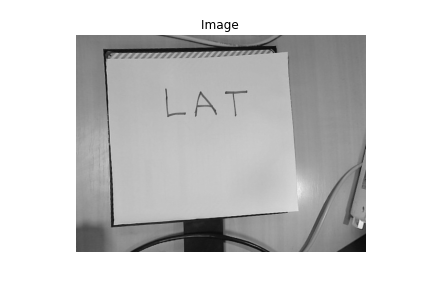

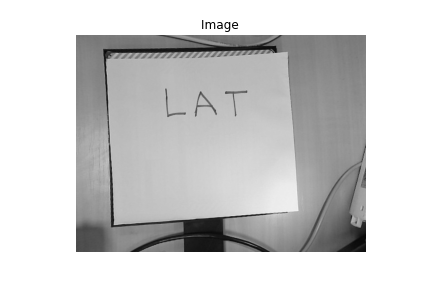

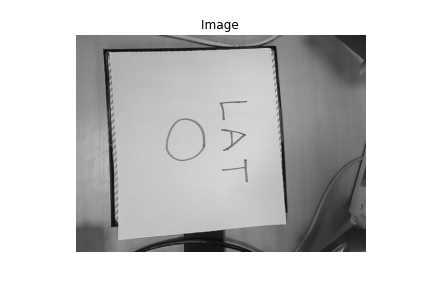

In [12]:

for image in images_nouveau_rgb:
# Afficher la première image
    plt.figure()
    plt.imshow(image)
    plt.title('Image ')
    plt.axis('off')  # Désactiver les axes
    plt.show()
    

# avec librairie OCR sans traitement 

### anciennes images

In [13]:

# Chemin vers l'exécutable de Tesseract (par défaut sur Ubuntu)
pytesseract.tesseract_cmd = '/usr/bin/tesseract'



for image in images_ancien_rgb:
    plt.figure()
    plt.imshow(image)
    plt.title('Image ')
    plt.axis('off')  # Désactiver les axes
    plt.show()
# Reconnaître le texte dans l'image
    text = pytesseract.image_to_string(image)
    text = pytesseract.image_to_string(image)
    print ("le texte est" ,text)

NameError: name 'images_ancien_rgb' is not defined

### nouvelles images

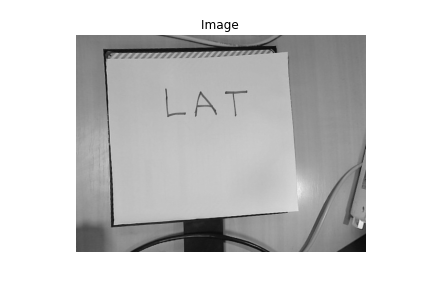

le texte est  



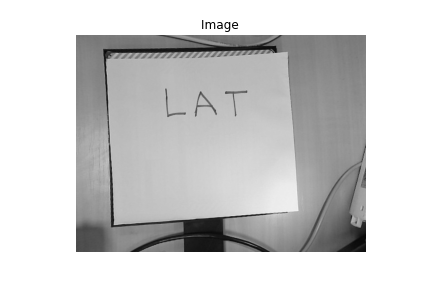

le texte est  



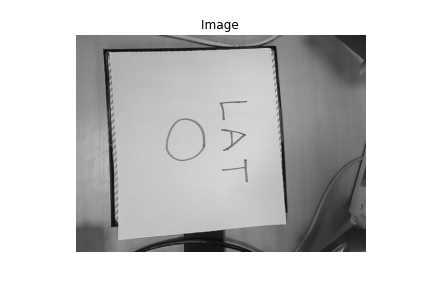

le texte est  



In [ ]:

# Chemin vers l'exécutable de Tesseract (par défaut sur Ubuntu)
pytesseract.tesseract_cmd = '/usr/bin/tesseract'



for image in images_nouveau_rgb:
    plt.figure()
    plt.imshow(image)
    plt.title('Image ')
    plt.axis('off')  # Désactiver les axes
    plt.show()
# Reconnaître le texte dans l'image
    text = pytesseract.image_to_string(image)
    text = pytesseract.image_to_string(image)
    print ("le texte est" ,text)

# avec librairie OCR  avec traitement 

dans cette partie je travaille uniquement avec les images qui ont eté prises par la camera en noir et blanc
dans ce cas  j'utilise dans un premier temps les outils de traitement d'images pour épurer les images 

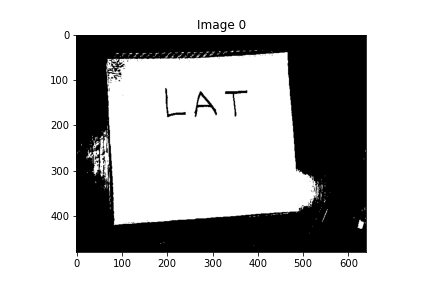

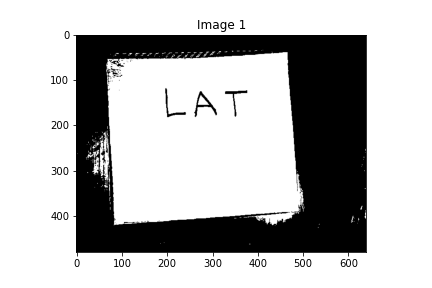

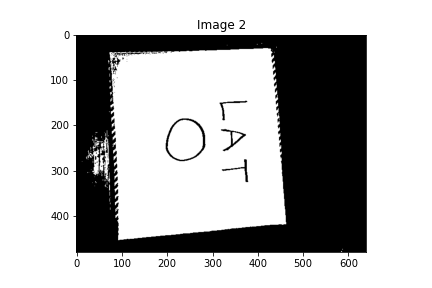

In [ ]:
images_thresolded=[]

for idx, image in enumerate(images_nouveau_rgb):
    # Faire une copie de l'image
    image_copy = image.copy()

    plt.figure()
    # Convertir en niveaux de gris
    gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Appliquer un seuillage avec un seuil haut
    _, thresholded = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)

    images_thresolded.append(thresholded)

    # Afficher l'image avec les contours
    plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))

    plt.title(f'Image {idx}')
    plt.show()


pour stocker les images après fermeture

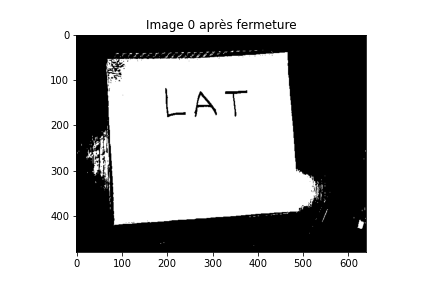

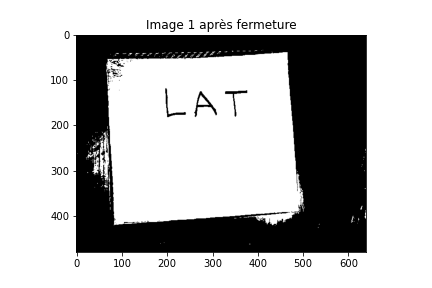

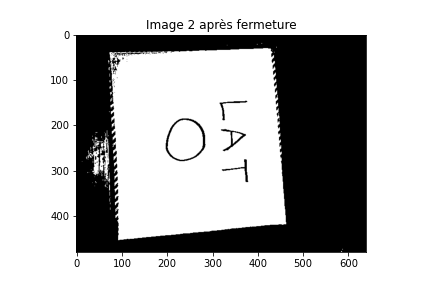

In [ ]:

images_closed = []

for idx, thresholded in enumerate(images_thresolded):
    # Appliquer une opération de fermeture
    kernel = np.ones((1,1 ), np.uint8)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    images_closed.append(closing)

    # Afficher l'image avec l'opération de fermeture
    plt.figure()
    plt.imshow(closing, cmap='gray')
    plt.title(f'Image {idx} après fermeture')
    plt.show()



    

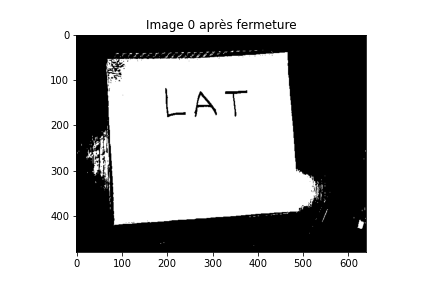

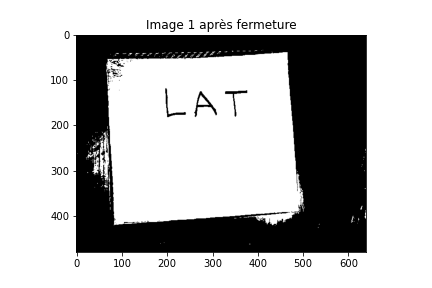

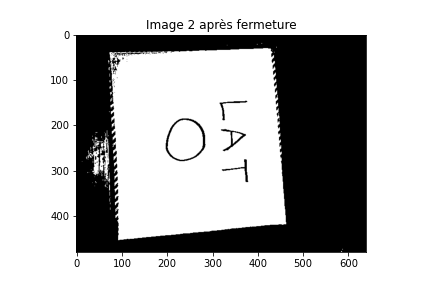

In [ ]:

images_closed = []

for idx, thresholded in enumerate(images_thresolded):
    # Appliquer une opération de fermeture
    kernel = np.ones((1,1 ), np.uint8)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    images_closed.append(closing)

    # Afficher l'image avec l'opération de fermeture
    plt.figure()
    plt.imshow(closing, cmap='gray')
    plt.title(f'Image {idx} après fermeture')
    plt.show()

In [ ]:
# Liste pour stocker les images rognées
images_traités = []

# Rogner toutes les images dans images_closed
for image in images_closed:
    # Rogner l'image suivant les coordonnées spécifiées
    cropped_image = image[100:400, 150:390]
    # Ajouter l'image rognée à la liste
    images_traités.append(cropped_image)

le texte est LAT



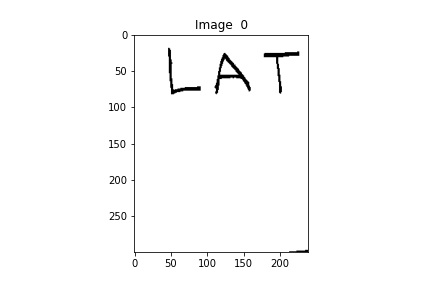

le texte est LAT



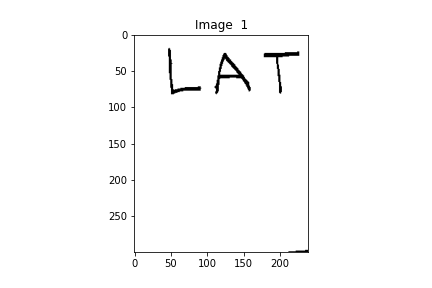

le texte est LAT



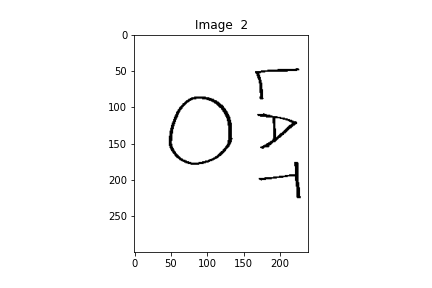

In [ ]:
# Afficher les images rognées
for idx, cropped_image in enumerate(images_traités):
    text = pytesseract.image_to_string(cropped_image)
    print("le texte est" ,text)
    plt.figure()
    plt.imshow(cropped_image, cmap='gray')  # Utilisez 'gray' si les images sont en niveaux de gris
    plt.title(f"Image  {idx}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prédiction: L


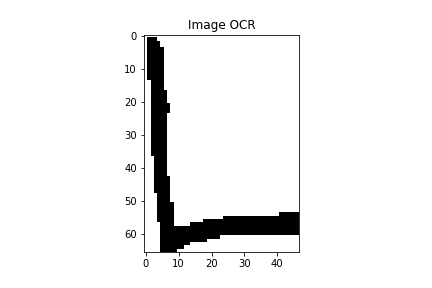

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: f


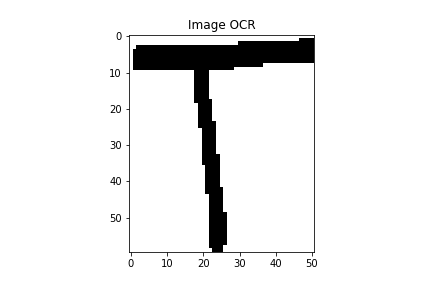

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: 1


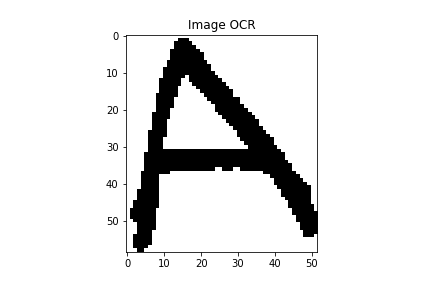

le texte est Lf1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: L


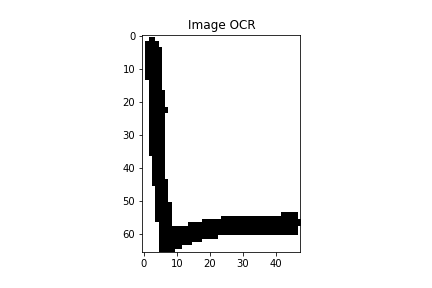

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prédiction: f


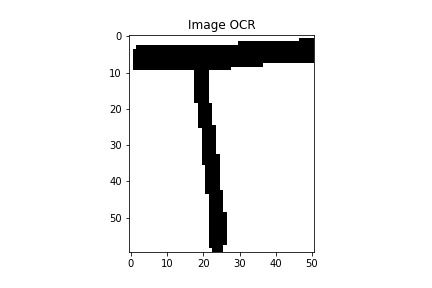

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: 1


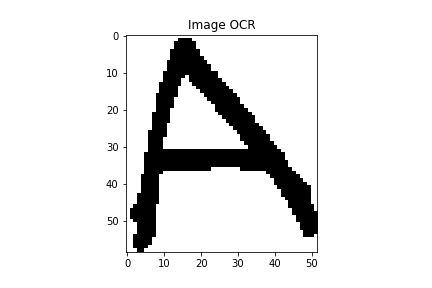

le texte est Lf1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: ,


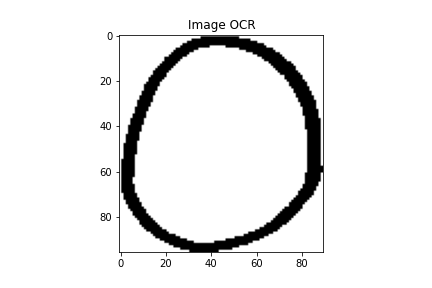

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: %


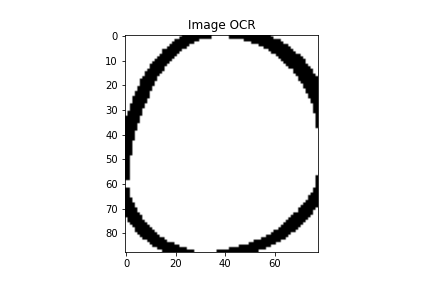

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prédiction: l


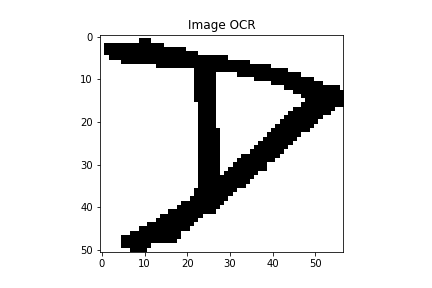

le texte est ,%l


In [ ]:
# Parcourir chaque image dans images_traités
for image in images_traités:
    # Prétraiter l'image en trouvant les contours
    contours, _ = cv2.findContours(image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

    # Définir une taille minimale pour les caractères
    min_area = 500  # Ajuster cette valeur selon la taille minimale attendue des caractères
    max_area = 7700  # Ajuster cette valeur selon la taille minimale attendue des caractères
    detected_chars = []  # Initialiser une liste pour stocker les caractères détectés dans l'image

    # Parcourir chaque contour trouvé dans l'image
    for contour in contours:
        # Calculer la surface du contour
        area = cv2.contourArea(contour)
        # Vérifier si la surface du contour dépasse la taille minimale attendue
        if area > min_area and area <max_area:
            # Extraire les coordonnées du rectangle englobant du contour
            x, y, w, h = cv2.boundingRect(contour)
            # Ajouter les coordonnées du rectangle englobant à la liste des caractères détectés
            detected_chars.append((x, y, w, h))

    
    detected_chars = sorted(detected_chars, key=lambda char: (char[1], char[0]))

    # Copier l'image pour dessiner les rectangles autour des caractères détectés
    image_copy = image.copy()
    

    predicted_Word=[]
    # Parcourir chaque caractère détecté
    for (x, y, w, h) in detected_chars:
        # Extraire la région d'intérêt (ROI) à partir de l'image copiée
        roi_ = image_copy[y:y+h, x:x+w]

        # Définir le noyau pour l'érosion
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))  # Vous pouvez ajuster la taille du noyau selon vos besoins

        # Effectuer une érosion sur la ROI
        roi_ = cv2.erode(roi_, kernel)
        
        # Prétraiter la ROI pour la passer à votre modèle de classification (svm_model)
        roi = preprocess_image(roi_, size)
        
        prediction = model.predict(roi)
        # Obtention de l'indice de la classe prédite avec la probabilité la plus élevée
        predicted_index = np.argmax(prediction)
        # Obtention du label correspondant à l'indice prédit
        predicted_label = label_binarizer.classes_[predicted_index]

        # Affichage de la prédiction et du vrai label
        print("Prédiction:", predicted_label)
        predicted_Word.append(predicted_label)



        # Afficher l'image de la ROI (avec érosion)
        plt.figure()
        plt.imshow(roi_, cmap='gray')
        plt.title(f"Image OCR")
        plt.show()  # Fermer toutes les fenêtres
        word = ''
        for letter in predicted_Word:
            word =  word +str(letter) 

    print("le texte est" ,word)